# Résolution d'équation différentielle - Methode d'Euler

<div class='alert alert-info'>
    <p>Dans ce TP la méthode d'Euler est utiliser pour résoudre numériquement l'équation différentielle : $y'(t)= y(t)$. La résolution numérique proposée consiste à passer d'une solution continue à une suite discrète de points approximant la solution.</p>
</div>

## 1. Questions théoriques

<p>
<img src="./TP1_image1.png" alt width=400 heigth=400>
<center>Ecart entre la solution exacte et l'approchée. </center>
<p>
    
1. Donner l'expression  de $f(to+dt)$ en fonction de $f(to)$ et de $df$
1. Exprimer maintenant $df$ en fonction de $dt$
1. Donner alors la valeur de $f(to+dt)$, en fonction de $dt$ et de $f(to)$
1. Pour $\delta t = 1$, calculer et tracer graphiquement $y_1=f(\delta t)$, $y_2=f(2\delta t)$ et $y_3=f(3\delta t)$ à partir de $y_0=f(0)=1$, les 3 points représentant une solution approchée de la fonction solution. 
1. Proposer alors un algorithme permettant de trouver des valeurs approchées de $f(t)$ avec un pas $\delta t$,  connaissant une condition initiale $f(t_0)$. 
1. Ecrire un code python correspondant à cet algorithme.
1. Donner la solution analytique de l'equation différentielle puis comparer avec la solution approchée sur un même graphique et évaluer l'erreur en fonction du pas de temps. Comment évolue t'elle ? 

1. $f(t_0+dt)=f(t_0)+df+\epsilon$
1. $df=f'(t_0)dt$
1. $f(t_0+dt)=f(t_0)+f'(t_0)dt+\epsilon$
1. $f(3\delta)=f(2\delta)+f(2\delta)\times dt$
1. $y_k=y_{k-1}+y_{k-1}'\delta t$

[1, 1.101010101010101, 1.212223242526273, 1.334670034700644, 1.469485189720911, 1.6179180371674675, 1.7813441015278177, 1.9612778491568903, 2.1593867228091015, 2.37750659379992, 2.6176587749918308, 2.882068752263733, 3.1731868080479484, 3.4937107280527915, 3.8466108015934775, 4.23515734720898, 4.662951018644231, 5.133956172042637, 5.652537603562096, 6.223500997861297, 6.852137462291731, 7.544272559492916, 8.306320292775029, 9.145342544570486, 10.069114518769524, 11.086196793392709, 12.206014651311165, 13.438945424170878, 14.796414658935614, 16.29100199822204, 17.936557755618207, 19.748331266286712, 21.74311220227527, 23.939386162101055, 26.357505976454696, 29.019880317510726, 31.951181359683527, 35.17857341621722, 38.73196467038058, 42.644284334055385, 46.95178780214179, 51.694392630640955, 56.91604845191782, 62.66514425514184, 68.99495680616627, 75.96414436234468, 83.63729025753102, 92.08550139465537, 101.3870671920953, 111.62818509028675, 122.90375934183086, 135.31828048747033, 148.9

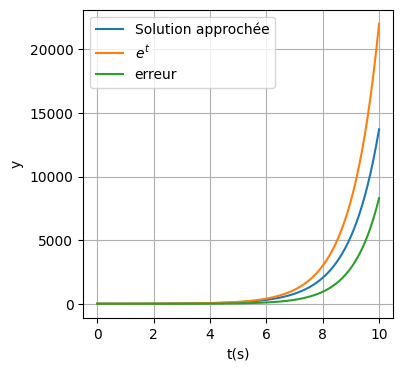

In [98]:
import matplotlib.pyplot as plt
import math

N = 100
t_i=0
t_f=10
dt=(t_f-t_i)/(N-1)
t = [0] * N
y = [1] * N
f_exp = [1] * N
erreur = [0] * N
for k in range(1,N):
    t[k]=t[k-1]+dt
    y[k]=y[k-1]*(1+dt)
    f_exp[k]=math.exp(t[k])
    erreur[k]=abs(y[k]-f_exp[k])


print(y,f_exp)

fig, ax = plt.subplots(figsize=(4, 4))
ax.plot(t, y, label="Solution approchée")
ax.plot(t, f_exp, label="$e^t$")
ax.plot(t, erreur, label="erreur")
ax.set_xlabel("t(s)")
ax.set_ylabel("y")
ax.grid()
ax.legend()
plt.show()

## 2. Refroidissement d’un fil

### 2.1. Avec la méthode d'Euler

On considère un fil suffisamment fin pour considérer sa température comme homogène. Le fil est
initialement chauffé à $500^{\circ}C$ puis trempé dans de l'eau à un température de $T_{eau}=10^\circ C$. On souhaite connaître la cinétique de
refroidissement de ce fil. L'équation de la thermique est donnée par :

$$\dot T = -\alpha(T - T_{eau}) \qquad (1)$$

où $T$ est la température actuelle du fil et $\alpha=\frac{Sh}{\rho VC_p}$ , où $S$ vaut $10^{-2}\, m^2$ ;
$h =800\, W.m^{-2} $; $V =1,4.10^{-5}\, m^3$ ; $\rho =7800\, kg.m^{-3}$ ; $C_p =500\, J.kg^{-1}$.


1. Donner la solution analytique de ce problème.
1. Proposer un algorithme basé sur le schéma d'Euler pour le résoudre.
1. Transcrire en code python votre algorithme. Comparer votre solution numérique à la solution théorique. 
1. Évaluer l'erreur en fonction du pas de temps. Commentaires !


1. $T(t) = T_{eau} + (T_0 - T_{eau}) e^{-\alpha t}$
1. $dT=-\alpha(T-T_{eau})dt$

[500, 485.4959854959855, 471.4212902506091, 457.76320640110725, 444.50940223783033, 431.6479110700994, 419.1671204216338, 407.05576154579455, 395.30289925117677, 383.8979220283647, 372.83053246893553, 362.0907379680605, 351.6688417023097, 341.5554338745135, 331.74138321777724, 322.2178287509766, 312.97617177829073, 304.0080681255497, 295.3054206063859, 286.860371711388, 278.6652965136557, 270.71279578435076, 262.9956893120275, 255.50700941971158, 248.23999467387338, 241.18808377961582, 234.34490965656508, 227.70429369011478, 221.26024015283386, 215.00693079100063, 208.9387195713758, 203.0501275834711, 197.33583809271087, 191.79069174002026, 186.4096818835058, 181.18795007802223, 176.12078168854438, 171.2036016333834, 166.43197025340388, 161.80157930351217, 157.30824806279696, 152.94791955980966, 148.71665690957664, 144.61063975903602, 140.62616083768964, 136.7596226103558, 133.00753402900068, 129.3665073807156, 125.83325522899428, 122.40458744554826, 119.07740832998091, 115.84871381471

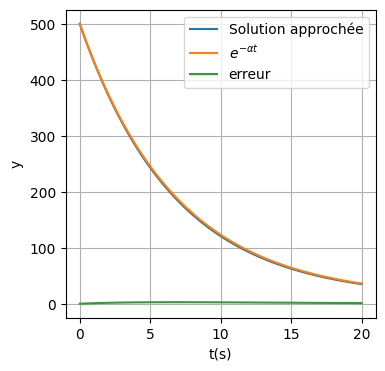

In [113]:
import matplotlib.pyplot as plt
import math

S=10**-2
h=800
V=1.4*10**-5
rho=7800
C_p=500
T_eau=10
T0=500
alpha=S*h/(rho*V*C_p)

N = 100
t_i=0
t_f=20
dt=(t_f-t_i)/(N-1)
t = [0] * N
T_approx = [T0] * N
T_reel = [T0] * N
erreur = [0] * N
for k in range(1,N):
    t[k]=t[k-1]+dt
    T_approx[k]=T_approx[k-1]-alpha*(T_approx[k-1]-T_eau)*dt
    T_reel[k]=T_eau+(T0-T_eau)*math.exp(-alpha*t[k])
    erreur[k]=abs(T_approx[k]-T_reel[k])


print(T_approx,T_reel)

fig, ax = plt.subplots(figsize=(4, 4))
ax.plot(t, T_approx, label="Solution approchée")
ax.plot(t, T_reel, label="$e^{-\\alpha t}$")
ax.plot(t, erreur, label="erreur")
ax.set_xlabel("t(s)")
ax.set_ylabel("y")
ax.grid()
ax.legend()
plt.show()

### 2.2. Avec la méthode améliorée RK2 (optionnel)

#### 2.2.1. Principe de la méthode

On se propose maintenant d'améliorer la méthode numérique en raffinant la valeur de la dérivée au
point de paramètre $t$ : en effet la dérivée variant avec le temps, la prise de la dérivée au point $t$ considéré ne permet pas de prendre en compte sa variation sur le pas de temps considéré (méthode d'ordre 1).

Pour réaliser cette amélioration, on va tenter d'extrapoler la valeur de la dérivée au temps $t + \frac{\delta t}{2}$ : c'est donc le point milieu entre $t_k$ et $t_{k+1}$. 

On va donc :
- évaluer la fonction au temps $t + \frac{\delta t}{2}$,
- puis calculer la dérivée correspondante par l'équation $y'(t)=f(t,y(t))$,
- puis utiliser cette dérivée au temps $t$ comme meilleur approximant,
- et finalement calculer la valeur de la fonction au temps $t + \frac{\delta t}{2}$ par un schéma d'Euler classique.

La méthode RK2 du point milieu est donc une composition de la méthode d'Euler par elle-même. On obtient la relation de récurrence :
$${\displaystyle y_{k+1}=y_{k}+\delta t f\left(t_{k}+{\frac {\delta t}{2}}\,,\,y_{k}+{\frac {\delta t}{2}}f\left(t_{k},y_{k}\right)\right)},$$
avec les étapes suivantes : 

- Estimation de la fonction à $t+\frac{\delta t}{2}$ avec Euler : $y(t+\frac{\delta t}{2})\simeq y_{(k+\frac 12)} =y_{k}+{\frac{\delta t}{2}}f\left(t_{k},y_{k}\right)$ : on garde $y_{(k+\frac 12)}$.
- Estimation de la dérivée au milieu du pas d'intégration à partir de l'équation $y'(t)=f(t,y(t))$ :
$y'(t+\frac{\delta t}{2})\simeq y'_{(k+\frac {1}{2})}=f\left(t_{k}+{\frac{\delta t}{2}}\,,\, y_{(k+\frac {1}{2})}\right)$. On garde $y'_{(k+\frac {1}{2})}$. 
- Calcul de la valeur de la fonction à partir de cette estimation : $\displaystyle y_{k+1}=y_{k}+\delta t y'_{(k+\frac {1}{2})}$

#### 2.2.2. Questions

1. Écrire un code python utilisant la méthode RK2 pour le problème précédent du fil refroidi
1. Cette méthode est d'ordre $2$ : c'est-à-dire, pour $n$ assez grand, l'erreur est proportionnelle à $\frac{1}{n^2}$. Que pouvez-vous tracer pour le vérifier ? 
1. Si l'on double le nombre $n$ de points considérés, par combien est divisée l'erreur ? 

In [ ]:
# Ecrire votre code ici